<a href="https://colab.research.google.com/github/MaryamMohammedElhanafi/EDA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importong our packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#reading the dataset
df = pd.read_csv("Cleaned_Dataset.csv")
#view the head of data
df.head()

,Job Title,Job Info,Position,Employer,City,Province,Skill,Seniority,Work Type,Industry Type,Min_Salary,Max_Salary,Avg_Salary
0,Systems and Data Analysts,Binance Accelerator Program - Data Analyst (Risk),Risk Analyst,Binance,Remote,Undef,"Python, Sql",ANY,Remote,Others,76000.00,89440.0,82720.000
1,Business and Marketing Analysts,Business Analyst,Business Analyst,Canadian Nuclear Laboratories,Remote,Undef,"Power Bi, Power BI, Excel",ANY,Remote,Others,65000.00,87000.0,76000.000
2,Business and Technical Analysts,Geophysicist/Data Analyst,Data Analyst,Sander Geophysics Limited,Ottawa,ON,Undef,ANY,In-Person,Technology,64123.59,86600.0,75361.795
3,Systems and Data Analysts,Business Intelligence Data Engineer,Data Engineer,"Maximus Services, LLC",Toronto,ON,"Fabric, Power BI, Sql, Machine Learning, Genes...",ANY,In-Person,Service,87875.00,105000.0,96437.500
4,Systems and Data Analysts,"BUSINESS INTELLIGENCE SPECIALIST, FT",Data Specialist,Niagara Health System,Niagara,ON,"Azure, Power BI, SQL, Aws",Senior,In-Person,Healthcare,115211.20,130332.8,122772.000


In [ ]:
print(df.dtypes)

Job Title         object
Job Info          object
Position          object
Employer          object
City              object
Province          object
Skill             object
Seniority         object
Work Type         object
Industry Type     object
Min_Salary       float64
Max_Salary       float64
Avg_Salary       float64
dtype: object


we can see the most attributes are categorical.

In [ ]:
df.describe()


,Min_Salary,Max_Salary,Avg_Salary
count,1796.000000,1796.000000,1796.00000
mean,68664.196687,88205.254972,78434.72583
std,18792.564520,20038.391957,18026.98823
min,30240.560000,57200.000000,43720.28000
25%,60000.000000,79040.000000,69500.00000
50%,68000.000000,87000.000000,77750.00000
75%,79839.635000,93600.000000,87770.80000
max,137280.000000,180000.000000,158640.00000


The mean and median are close to each other, the data has uniform distribution

In [ ]:
df.describe(include=['object'])

,Job Title,Job Info,Position,Employer,City,Province,Skill,Seniority,Work Type,Industry Type
count,1796,1796,1796,1796,1796,1796,1796,1796,1796,1796
unique,10,811,27,790,172,14,1057,4,3,22
top,Senior Supply Chain Data Analysts,Business Analyst,Analyst,Scotiabank,Toronto,ON,Undef,ANY,In-Person,Others
freq,262,90,780,24,426,949,167,1359,1635,948


In [ ]:
df[['Min_Salary', 'Max_Salary', 'Avg_Salary']].corr()

,Min_Salary,Max_Salary,Avg_Salary
Min_Salary,1.000000,0.723886,0.923562
Max_Salary,0.723886,1.000000,0.933103
Avg_Salary,0.923562,0.933103,1.000000


In [ ]:
df['Industry Type'].value_counts()

,count
Industry Type,
Others,948
Technology,342
Healthcare,121
Finance,102
Service,59
Consulting,50
Automotive,26
Energy,23
Education,18


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Technology'),
  Text(2, 0, 'Service'),
  Text(3, 0, 'Healthcare'),
  Text(4, 0, 'Insurance'),
  Text(5, 0, 'Finance'),
  Text(6, 0, 'Energy'),
  Text(7, 0, 'Automotive'),
  Text(8, 0, 'Education'),
  Text(9, 0, 'Construction'),
  Text(10, 0, 'Consulting'),
  Text(11, 0, 'Real Estate'),
  Text(12, 0, 'Transportation'),
  Text(13, 0, 'Aerospace'),
  Text(14, 0, 'Media'),
  Text(15, 0, 'Government'),
  Text(16, 0, 'Legal'),
  Text(17, 0, 'Manufacturing'),
  Text(18, 0, 'Telecommunications'),
  Text(19, 0, 'Retail'),
  Text(20, 0, 'Agriculture'),
  Text(21, 0, 'Travel')])

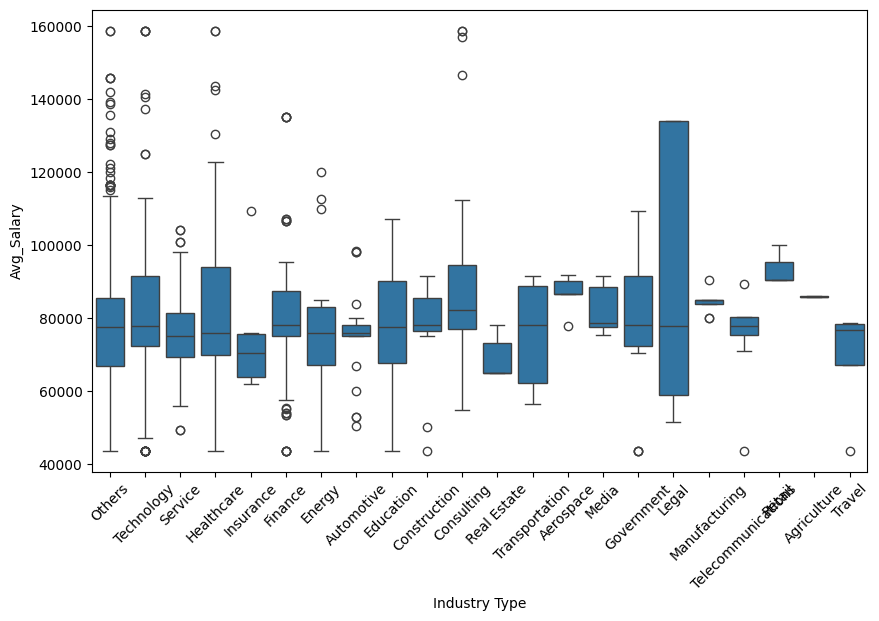

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Industry Type", y="Avg_Salary", data= df)
plt.xticks(rotation=45)

From the plot above, there are lots of outlier and industry type attribute would not be a good predictor of AVG price.

In [ ]:
df['Work Type'].value_counts()

,count
Work Type,
In-Person,1635
Remote,141
Hybrid,20


<Axes: xlabel='Work Type', ylabel='Avg_Salary'>

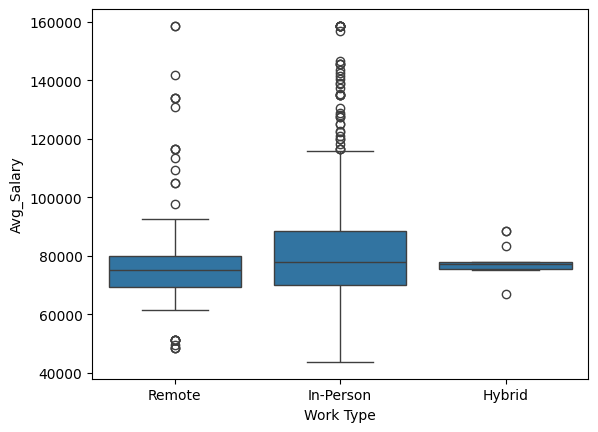

In [ ]:
sns.boxplot(x="Work Type", y="Avg_Salary", data=df)

In [ ]:
df['Seniority'].value_counts()

,count
Seniority,
ANY,1359
Senior,368
Mid,36
Junior,33


<Axes: xlabel='Seniority', ylabel='Avg_Salary'>

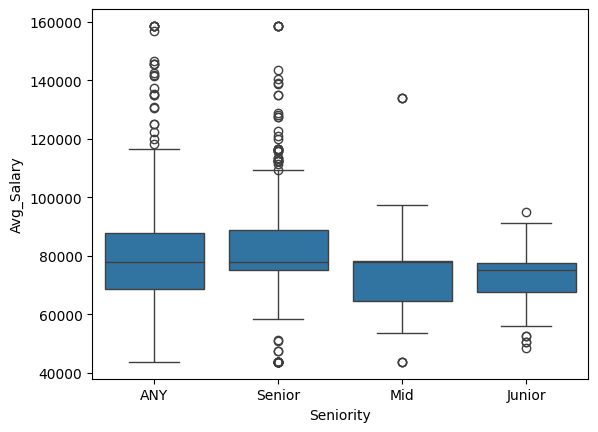

In [ ]:
sns.boxplot(x="Seniority", y="Avg_Salary", data=df)

There is no big difference betwwn senior and other levels, may be due to the feild (ANY) which maybe contain the types of three levels.

Now, let's descover the Skill attribut.

In [ ]:
df['Skills_list'] = df['Skill'].str.split(',')

In [ ]:
from collections import Counter
import pandas as pd
# Flatten the list of skills and count frequency
all_skills = [skill.strip() for sublist in df['Skills_list'] for skill in sublist]
skill_counts = Counter(all_skills)

# Convert to DataFrame for better handling
skills_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Frequency'])
skills_df = skills_df.sort_values(by='Frequency', ascending=False)

# Display the most common skills
print(skills_df.head(10))

          Skill  Frequency
12          SQL        491
0        Python        439
4         Excel        435
1           Sql        348
27      Tableau        295
3      Power BI        294
10     Database        227
113  Statistics        217
110      No SQL        172
2      Power Bi        171


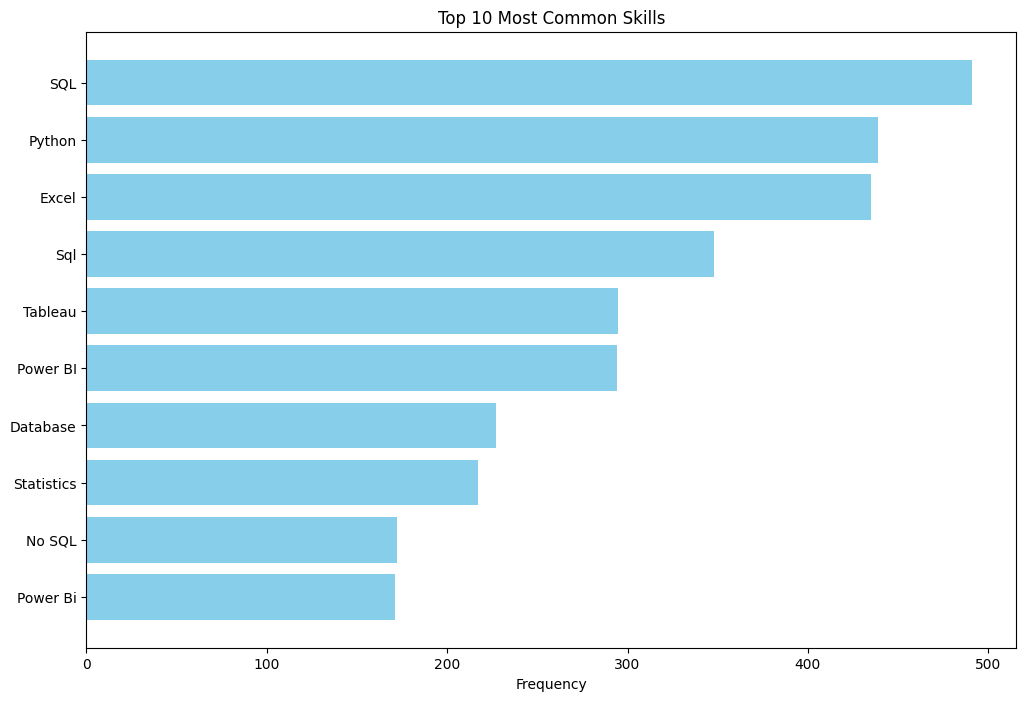

In [ ]:
# Plot the top 10 skills
plt.figure(figsize=(12, 8))
top_skills = skills_df.head(10)
plt.barh(top_skills['Skill'], top_skills['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 10 Most Common Skills')
plt.gca().invert_yaxis()  # Highest frequencies on top
plt.show()